In [2]:
import pandas as pd
import numpy as np

# 1. Configuración del proyecto
    • Crear una carpeta llamada Proyecto_Frutas.
    • Dentro, crear un archivo llamado analisis_frutas.py.
    • Instalar pandas y numpy desde la terminal de VS Code.
    • Probar una lectura básica del CSV.

In [3]:
frutas_df = pd.read_csv('Fruits.csv', index_col=0)

frutas_df.head()

,Cherry,Mango,Banana,Guava,Litchi,Wastage
0,30153,45568,42342,23946,15399,19466
1,13003,29345,34255,19097,34973,7116
2,6619,12263,2710,6462,7689,25064
3,32956,32519,1548,45711,35422,19784
4,42122,16142,37817,42599,10118,44063


# 2. Lectura y limpieza de datos 
    • Leer el archivo fruit_sales.csv con pandas.
    • Validar nombres y tipos de columnas.
    • Verificar que no hay datos faltantes o inconsistentes.
    • Crear una columna Periodo para identificar cada fila.

In [4]:
frutas_df.columns

Index(['Cherry', 'Mango', 'Banana', 'Guava', 'Litchi', 'Wastage'], dtype='object')

In [5]:
frutas_df.dtypes

Cherry     int64
Mango      int64
Banana     int64
Guava      int64
Litchi     int64
Wastage    int64
dtype: object

In [6]:
frutas_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3600 entries, 0 to 3599
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Cherry   3600 non-null   int64
 1   Mango    3600 non-null   int64
 2   Banana   3600 non-null   int64
 3   Guava    3600 non-null   int64
 4   Litchi   3600 non-null   int64
 5   Wastage  3600 non-null   int64
dtypes: int64(6)
memory usage: 196.9 KB


**Crear una columna Periodo para identificar cada fila.**

In [7]:
frutas_df['Periodo'] = np.random.choice(a=range(10), size=3600 )
frutas_df.head()

,Cherry,Mango,Banana,Guava,Litchi,Wastage,Periodo
0,30153,45568,42342,23946,15399,19466,8
1,13003,29345,34255,19097,34973,7116,7
2,6619,12263,2710,6462,7689,25064,9
3,32956,32519,1548,45711,35422,19784,0
4,42122,16142,37817,42599,10118,44063,4


**Calcular el total de ventas por período: TotalVentas = Cherry + Mango + Banana + Guava + Litchi**

In [8]:
frutas_df['TotalVentas'] = frutas_df[['Cherry', 'Mango', 'Banana', 'Guava', 'Litchi']].sum(axis=1)
frutas_df.head()

,Cherry,Mango,Banana,Guava,Litchi,Wastage,Periodo,TotalVentas
0,30153,45568,42342,23946,15399,19466,8,157408
1,13003,29345,34255,19097,34973,7116,7,130673
2,6619,12263,2710,6462,7689,25064,9,35743
3,32956,32519,1548,45711,35422,19784,0,148156
4,42122,16142,37817,42599,10118,44063,4,148798


**Agrupando por Periodo**

In [9]:
total_periodo = frutas_df.groupby(by='Periodo').TotalVentas.sum().to_frame()
total_periodo

,TotalVentas
Periodo,
0,48633529
1,45992541
2,48489629
3,49063623
4,52683310
5,47345739
6,50863212
7,48344793
8,47221706


# 3. Análisis con Pandas


**Fruta más vendida (suma total de todos los períodos).**

In [10]:
frutas_df[['Cherry', 'Mango', 'Banana', 'Guava', 'Litchi']].sum().sort_values(ascending=False).to_frame()

,0
Mango,99978176
Guava,98709222
Litchi,98027815
Cherry,97782840
Banana,93041857


La fruta más vendida fue Mango y la menos fue Banana 

**Período con menor desperdicio.**

In [11]:
desperdicio_periodos = frutas_df.groupby(by='Periodo').Wastage.sum().sort_values().to_frame()
desperdicio_periodos

,Wastage
Periodo,
2,9207430
1,9333524
3,9589389
9,9748423
8,9809025
6,9897764
0,9986198
5,10047652
7,10170609


El periodo con menor desperdicio fue el 1

**Promedio, máximo y mínimo de ventas por fruta.**

In [12]:
#promedio
frutas_df[['Cherry', 'Mango', 'Banana', 'Guava', 'Litchi']].mean().to_frame()

,0
Cherry,27161.900000
Mango,27771.715556
Banana,25844.960278
Guava,27419.228333
Litchi,27229.948611


In [13]:
#maxima
frutas_df[['Cherry', 'Mango', 'Banana', 'Guava', 'Litchi']].max().to_frame()

,0
Cherry,49942
Mango,49972
Banana,49986
Guava,49996
Litchi,49998


In [14]:
#minimo
frutas_df[['Cherry', 'Mango', 'Banana', 'Guava', 'Litchi']].min().to_frame()

,0
Cherry,5011
Mango,5003
Banana,500
Guava,5015
Litchi,5005


**Porcentaje de desperdicio respecto al total de ventas por período.**

In [15]:
analisis_desperdicio = pd.concat([total_periodo, desperdicio_periodos],axis=1)
analisis_desperdicio

,TotalVentas,Wastage
Periodo,,
0,48633529,9986198
1,45992541,9333524
2,48489629,9207430
3,49063623,9589389
4,52683310,10819326
5,47345739,10047652
6,50863212,9897764
7,48344793,10170609
8,47221706,9809025


In [16]:
analisis_desperdicio['%desperdicio'] = analisis_desperdicio.Wastage * 100 / analisis_desperdicio.TotalVentas
analisis_desperdicio

,TotalVentas,Wastage,%desperdicio
Periodo,,,
0,48633529,9986198,20.533566
1,45992541,9333524,20.293560
2,48489629,9207430,18.988452
3,49063623,9589389,19.544804
4,52683310,10819326,20.536534
5,47345739,10047652,21.221872
6,50863212,9897764,19.459573
7,48344793,10170609,21.037651
8,47221706,9809025,20.772280


# 4. Análisis con NumPy

In [17]:
frutas_df.columns

Index(['Cherry', 'Mango', 'Banana', 'Guava', 'Litchi', 'Wastage', 'Periodo',
       'TotalVentas'],
      dtype='object')

In [18]:
cherry_array = frutas_df['Cherry'].to_numpy()
mango_array = frutas_df['Mango'].to_numpy()
banana_array = frutas_df['Banana'].to_numpy()
guava_array = frutas_df['Guava'].to_numpy()
litchi_array = frutas_df['Litchi'].to_numpy()

In [19]:
print(f'Media de Cherry: {cherry_array.mean()}\nDesviación estándar: {cherry_array.std()}\n')
print(f'Media de Mango: {mango_array.mean()}\nDesviación estándar: {mango_array.std()}\n')
print(f'Media de Banana: {banana_array.mean()}\nDesviación estándar: {banana_array.std()}\n')
print(f'Media de Guava: {guava_array.mean()}\nDesviación estándar: {guava_array.std()}\n')

Media de Cherry: 27161.9
Desviación estándar: 12908.99099899842

Media de Mango: 27771.715555555555
Desviación estándar: 12883.19991803202

Media de Banana: 25844.960277777776
Desviación estándar: 14508.452364774203

Media de Guava: 27419.228333333333
Desviación estándar: 12921.461810710181



# 5. Visualización y exportación

In [20]:
analisis_desperdicio

,TotalVentas,Wastage,%desperdicio
Periodo,,,
0,48633529,9986198,20.533566
1,45992541,9333524,20.293560
2,48489629,9207430,18.988452
3,49063623,9589389,19.544804
4,52683310,10819326,20.536534
5,47345739,10047652,21.221872
6,50863212,9897764,19.459573
7,48344793,10170609,21.037651
8,47221706,9809025,20.772280


In [21]:
frutas = ['Cherry', 'Mango', 'Banana', 'Guava', 'Litchi']
ventasPeriodo_frutas = frutas_df.groupby(by='Periodo')[frutas].sum()
ventasPeriodo_frutas

,Cherry,Mango,Banana,Guava,Litchi
Periodo,,,,,
0,9972967,10064314,9177004,10102566,9316678
1,9212883,9442550,8617399,9406630,9313079
2,9866214,10065522,9307822,9827407,9422664
3,9687639,9882122,9147250,10175413,10171199
4,10785287,10712378,10048235,10755199,10382211
5,9617503,9883401,9029529,9099916,9715390
6,9963629,10686722,9641238,10152017,10419606
7,9475301,9724767,9369884,9877148,9897693
8,9438828,9426863,9114042,9654749,9587224


In [22]:
reporte = pd.concat([ventasPeriodo_frutas,  analisis_desperdicio], axis=1)
reporte

,Cherry,Mango,Banana,Guava,Litchi,TotalVentas,Wastage,%desperdicio
Periodo,,,,,,,,
0,9972967,10064314,9177004,10102566,9316678,48633529,9986198,20.533566
1,9212883,9442550,8617399,9406630,9313079,45992541,9333524,20.293560
2,9866214,10065522,9307822,9827407,9422664,48489629,9207430,18.988452
3,9687639,9882122,9147250,10175413,10171199,49063623,9589389,19.544804
4,10785287,10712378,10048235,10755199,10382211,52683310,10819326,20.536534
5,9617503,9883401,9029529,9099916,9715390,47345739,10047652,21.221872
6,9963629,10686722,9641238,10152017,10419606,50863212,9897764,19.459573
7,9475301,9724767,9369884,9877148,9897693,48344793,10170609,21.037651
8,9438828,9426863,9114042,9654749,9587224,47221706,9809025,20.772280


In [23]:
reporte.to_csv('reporte_frutas.csv')

In [34]:
reporte[frutas].sum().sort_values(ascending=False).to_frame()

,0
Mango,99978176
Guava,98709222
Litchi,98027815
Cherry,97782840
Banana,93041857


In [44]:
proedio_desperdicio = reporte['%desperdicio'].mean()
proedio_desperdicio

np.float64(20.232297368032153)

In [35]:
import matplotlib.pyplot as plt

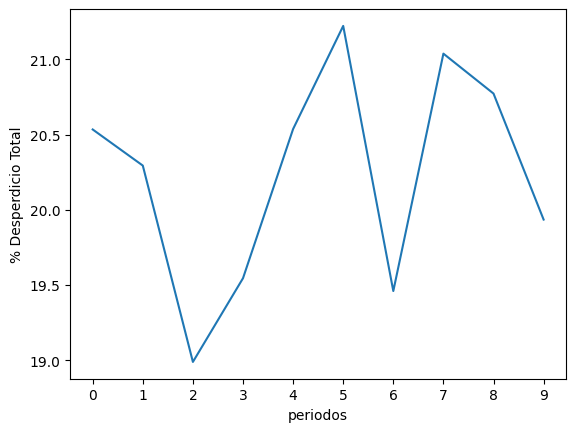

In [41]:
plt.plot(reporte['%desperdicio'].index,  reporte['%desperdicio'])
plt.xlabel('periodos')
plt.xticks(reporte['%desperdicio'].index)
plt.ylabel('% Desperdicio Total');

In [51]:
desv_ventas_frutas = frutas_df[frutas].std()
desv_ventas_frutas

Cherry    12910.784288
Mango     12884.989624
Banana    14510.467848
Guava     12923.256832
Litchi    13097.099309
dtype: float64

In [52]:
promedio_ventas_frutas = frutas_df[frutas].mean()
promedio_ventas_frutas

Cherry    27161.900000
Mango     27771.715556
Banana    25844.960278
Guava     27419.228333
Litchi    27229.948611
dtype: float64

In [50]:
variabilidad_ventas_frutas = desv_ventas_frutas * 100 / promedio_ventas_frutas
variabilidad_ventas_frutas

Cherry    47.532699
Mango     46.396088
Banana    56.144284
Guava     47.132095
Litchi    48.098142
dtype: float64

## Ratio Ventas / desperdicio por frutas

In [57]:
ventas_por_frutas = frutas_df[frutas].sum().to_frame()
ventas_por_frutas

,0
Cherry,97782840
Mango,99978176
Banana,93041857
Guava,98709222
Litchi,98027815


In [59]:
ventas_por_frutas['ratio_ventas_desperdicio'] = ventas_por_frutas[0] /frutas_df['Wastage'].sum()
ventas_por_frutas

,0,ratio_ventas_desperdicio
Cherry,97782840,0.991618
Mango,99978176,1.013881
Banana,93041857,0.943540
Guava,98709222,1.001013
Litchi,98027815,0.994103


## Correlacion entre diferentes frutas

In [72]:
import seaborn as sns

In [60]:
reporte

,Cherry,Mango,Banana,Guava,Litchi,TotalVentas,Wastage,%desperdicio
Periodo,,,,,,,,
0,9972967,10064314,9177004,10102566,9316678,48633529,9986198,20.533566
1,9212883,9442550,8617399,9406630,9313079,45992541,9333524,20.293560
2,9866214,10065522,9307822,9827407,9422664,48489629,9207430,18.988452
3,9687639,9882122,9147250,10175413,10171199,49063623,9589389,19.544804
4,10785287,10712378,10048235,10755199,10382211,52683310,10819326,20.536534
5,9617503,9883401,9029529,9099916,9715390,47345739,10047652,21.221872
6,9963629,10686722,9641238,10152017,10419606,50863212,9897764,19.459573
7,9475301,9724767,9369884,9877148,9897693,48344793,10170609,21.037651
8,9438828,9426863,9114042,9654749,9587224,47221706,9809025,20.772280


In [70]:

cor_matriz = reporte[frutas].corr(method='pearson')
cor_matriz

,Cherry,Mango,Banana,Guava,Litchi
Cherry,1.000000,0.875051,0.844009,0.797020,0.546790
Mango,0.875051,1.000000,0.842530,0.686389,0.683917
Banana,0.844009,0.842530,1.000000,0.731523,0.721375
Guava,0.797020,0.686389,0.731523,1.000000,0.609366
Litchi,0.546790,0.683917,0.721375,0.609366,1.000000


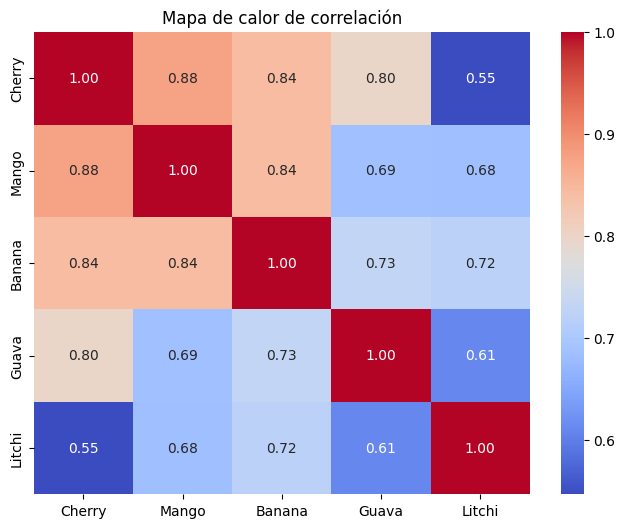

In [79]:
plt.figure(figsize=(8, 6)) # Adjust figure size for better readability
sns.heatmap(cor_matriz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0
           )
plt.title('Mapa de calor de correlación')
plt.show()